In [1]:
from csdids.ATTgt import ATTgt

In [2]:
import findspark
import warnings
findspark.init()


from pyspark.sql import  SparkSession, Row
from pyspark.sql.functions import \
	lit, col, when, expr, countDistinct,\
	monotonically_increasing_id, desc
spark = SparkSession.builder.appName('test_preprocesdid')\
    .config('spark.master', 'local[4]')\
    .config('spark.executor.memory', '1g')\
    .config("spark.sql.shuffle.partitions", 1)\
    .config('spark.driver.memory','4g')\
    .config('spark.driver.cores', '5')\
    .config('spark.rdd.compress', True)\
    .getOrCreate()

In [3]:
%%time
import os

# name = 'https://raw.githubusercontent.com/d2cml-ai/csdid/function-aggte/data/mpdta.csv'
name = r'D:\Workflow\work\csdid_r\R\5g10t.csv'
# name = r'D:\Workflow\work\csdid_r\R\data\mpdta.csv'
# os.path.exists(name)

yname, gname, idname, tname = 'Y', 'G', 'id', 'period'
# yname, gname, idname, tname = 'lemp', 'first_treat', 'countyreal', 'year'
# yname, gname, idname, tname = 'lemp', 'first.treat', 'countyreal', 'year'
control_group = ['nevertreated', 'notyettreated']
anticipation = 0
panel = True
allow_unbalanced_panel = True
weights_name = None

clustervar = None
xfmla = None

data = spark.read.csv(name, header=True, inferSchema=True)
# data.show(5)
a = ATTgt(data=data, tname=tname, gname=gname, yname=yname, idname=idname)
a.fit(bstrap=True)

100%|██████████| 5/5 [02:26<00:00, 29.38s/it]


CPU times: total: 1min 19s
Wall time: 2min 50s


In [4]:
a.sum_gt().summary2_gt

ValueError: Length mismatch: Expected axis has 9 elements, new values have 8 elements

,group,time,att,post,se,c,upper,lower,sig
0,2,2,0.910233,1,0.028280,3.082266,0.823067,0.997400,*
1,2,3,0.985643,1,0.037705,3.082266,0.869425,1.101861,*
2,2,4,1.146458,1,0.052511,3.082266,0.984605,1.308311,*
3,2,5,1.795844,1,0.063642,3.082266,1.599682,1.992005,*
4,2,6,4.293135,1,0.082461,3.082266,4.038969,4.547301,*
5,2,7,4.389974,1,0.094445,3.082266,4.098869,4.681078,*
6,2,8,4.475862,1,0.107035,3.082266,4.145951,4.805774,*
7,2,9,4.560870,1,0.120864,3.082266,4.188335,4.933406,*
8,2,10,4.652373,1,0.135194,3.082266,4.235670,5.069076,*
9,3,2,0.109244,0,0.028649,3.082266,0.020941,0.197548,*


In [ ]:
a.compute_aggte(na_rm=False, typec='simple')
a.compute_aggte(na_rm=False, typec='group')
a.compute_aggte(na_rm=False, typec='calendar')



   ATT Std. Error [95.0%  Conf. Int.]  
4.3129     0.0617 4.1919       4.4339 *


---
Signif. codes: `*' confidence band does not cover 0
Control Group:  None , 
Anticipation Periods:  0
Estimation Method:  Doubly Robust




Overall summary of ATT's based on group/cohort aggregation:
   ATT Std. Error [95.0%  Conf. Int.]  
4.5278     0.0677 4.3951       4.6605 *


Group Effects:
   Group  Estimate  Std. Error  [95.0% Simult.   Conf. Band   
0      2    3.0234      0.0728           2.8808      3.1660  *
1      3    3.7850      0.0746           3.6388      3.9312  *
2      4    4.5084      0.0762           4.3591      4.6578  *
3      5    5.3098      0.0762           5.1604      5.4591  *
4      6    6.0074      0.0804           5.8498      6.1650  *
---
Signif. codes: `*' confidence band does not cover 0
Control Group:  None , 
Anticipation Periods:  0
Estimation Method:  Doubly Robust




Overall summary of ATT's based on calendar time aggregation:
   ATT Std. Error [95.0%  Conf. In

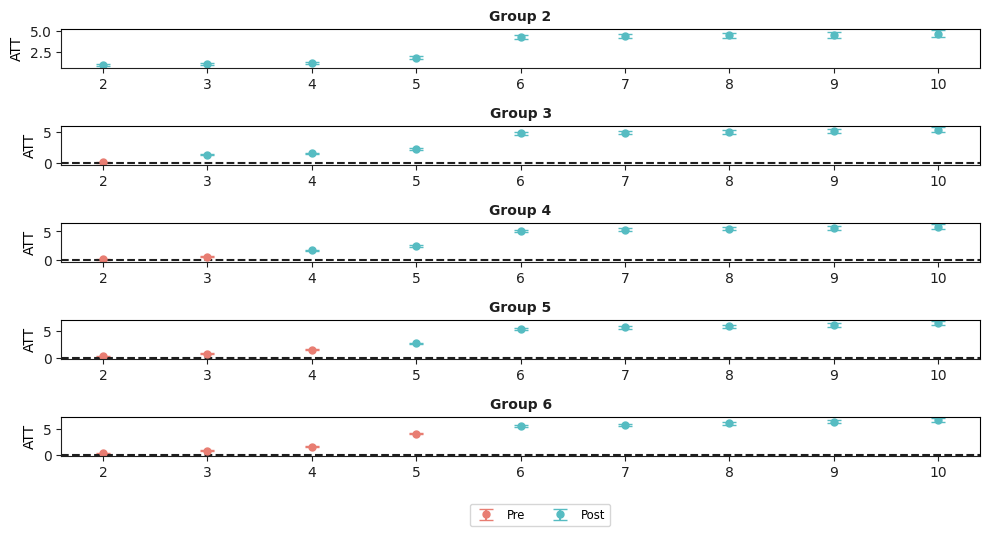

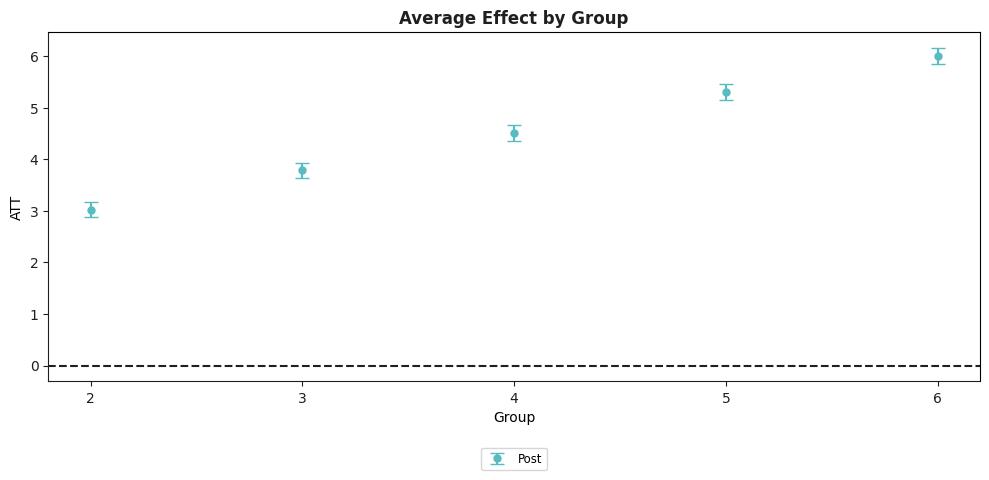

In [ ]:

a.plot_attgt();
a.plot_aggte();